
# Generación de Variables Aleatorias mediante el Método de la Convolución

Este notebook muestra cómo generar variables aleatorias usando el método de la convolución
para obtener distribuciones **Normal** y **Binomial**.

## Método de Convolución para Distribución Normal
Dado que una variable normal puede considerarse como la suma de variables independientes,
sumamos múltiples variables con una distribución uniforme para aproximar la normal.

## Método de Convolución para Distribución Binomial
Para una distribución binomial, el método de convolución implica la suma de múltiples variables
de Bernoulli independientes para obtener una distribución binomial.


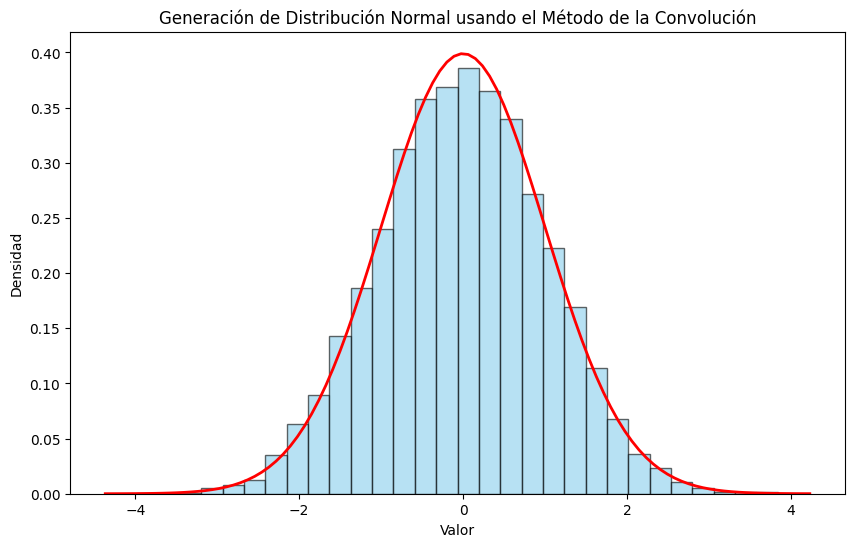

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generar variables aleatorias con distribución normal usando convolución
def normal_convolution(n, samples=10000):
    uniform_samples = np.random.uniform(0, 1, (samples, n))
    normal_approximation = np.sum(uniform_samples, axis=1) - (n / 2) # centra al rededor de 0 porque la distribucion es uniforme
    normal_approximation /= np.sqrt(n / 12) # ajusta la varianza de esta suma para que se asemeje a la varianza estándar de una distribución normal con media 0 y varianza 1.
    return normal_approximation

# Generar datos
n = 12  # Número de variables uniformes para aproximar la normal
samples = normal_convolution(n)

# Graficar la aproximación
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 0, 1)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Generación de Distribución Normal usando el Método de la Convolución")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.show()


Este código es una implementación del método de la convolución para generar una distribución normal a partir de variables uniformes. La razón de su funcionamiento es el Teorema Central del Límite, que garantiza que la suma de variables independientes tiende a una distribución normal, y el ajuste realizado (restarn/2 y dividir por n/12) permite que el resultado tenga la misma media y varianza que una normal estándar.

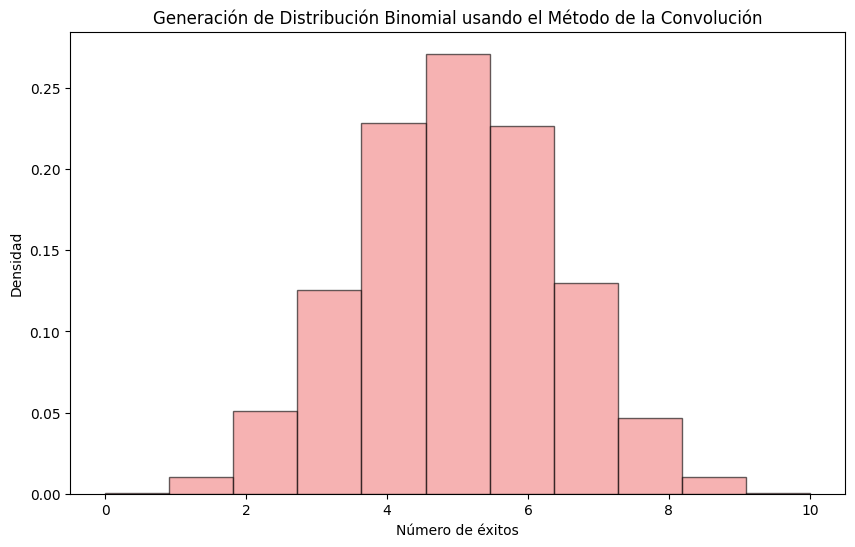

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Generar variables aleatorias con distribución binomial usando convolución
def binomial_convolution(trials, p, samples=10000):
    bernoulli_samples = np.random.binomial(1, p, (samples, trials))
    binomial_samples = np.sum(bernoulli_samples, axis=1)
    return binomial_samples

# Parámetros de la distribución binomial
trials = 10  # Número de ensayos
p = 0.5  # Probabilidad de éxito en cada ensayo
samples = binomial_convolution(trials, p)

# Graficar la aproximación
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=trials + 1, density=True, alpha=0.6, color='lightcoral', edgecolor='black')
plt.title("Generación de Distribución Binomial usando el Método de la Convolución")
plt.xlabel("Número de éxitos")
plt.ylabel("Densidad")
plt.show()


Al sumar cada fila de bernoulli_samples, se obtiene el número de éxitos en trials ensayos para cada muestra. Esta suma sigue una distribución binomial 
Binomial
(
𝑛
=
trials
,
𝑝
)
Binomial(n=trials,p).

Este código utiliza la suma de variables de Bernoulli (convolución) para generar una distribución binomial de manera eficiente, ya que la suma de varias variables de Bernoulli con probabilidad 𝑝 es equivalente a una variable aleatoria binomial con los parámetros especificados.